<a href="https://colab.research.google.com/github/Sindhuhar/practice_computer_vision/blob/main/14_augmented_reality_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AprilTag with Python

In [12]:
!pip install apriltag

In [13]:
# import the necessary packages
import matplotlib.pyplot as plt
import apriltag
import argparse
import cv2

### Function to display images in Google Colab

In [14]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Implementing AprilTag detection with Python

In [20]:
from google.colab import files
uploaded = files.upload()

Saving augmentedd.png to augmentedd.png


In [21]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
# 	help="path to input image containing AprilTag")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values

args = {
    "image" : "augmentedd.png"
}

In [22]:
# load the input image and convert it to grayscale

print("[INFO] loading image...")
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

[INFO] loading image...


In [23]:
# define the AprilTags detector options and then detect the AprilTags
# in the input image

print("[INFO] detection AprilTags....")
options = apriltag.DetectorOptions(families = "tag36h11")
detector = apriltag.Detector(options)
results = detector.detect(gray)
print("[INFO] {} total AprilTags detected".format(len(results)))

[INFO] detection AprilTags....
[INFO] 5 total AprilTags detected


[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11


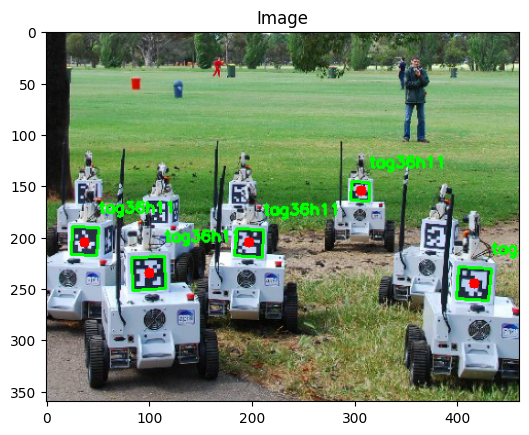

In [24]:
# loop over the AprilTag detection results
for r in results:
	# extract the bounding box (x, y)-coordinates for the AprilTag
	# and convert each of the (x, y)-coordinate pairs to integers
	(ptA, ptB, ptC, ptD) = r.corners
	ptB = (int(ptB[0]), int(ptB[1]))
	ptC = (int(ptC[0]), int(ptC[1]))
	ptD = (int(ptD[0]), int(ptD[1]))
	ptA = (int(ptA[0]), int(ptA[1]))

	# draw the bounding box of the AprilTag detection
	cv2.line(image, ptA, ptB, (0, 255, 0), 2)
	cv2.line(image, ptB, ptC, (0, 255, 0), 2)
	cv2.line(image, ptC, ptD, (0, 255, 0), 2)
	cv2.line(image, ptD, ptA, (0, 255, 0), 2)

	# draw the center (x, y)-coordinates of the AprilTag
	(cX, cY) = (int(r.center[0]), int(r.center[1]))
	cv2.circle(image, (cX, cY), 5, (0, 0, 255), -1)

	# draw the tag family on the image
	tagFamily = r.tag_family.decode("utf-8")
	cv2.putText(image, tagFamily, (ptA[0], ptA[1] - 15),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
	print("[INFO] tag family: {}".format(tagFamily))

 # show the output image after AprilTag detection
plt_imshow("Image", image)

#Generating ArUco markers with OpenCV and Python

In [54]:
!pip install opencv-contrib-python

In [48]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import sys
from cv2 import aruco
import os

In [49]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [50]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-o", "--output", required=True,
# 	help="path to output image containing ArUCo tag")
# ap.add_argument("-i", "--id", type=int, required=True,
# 	help="ID of ArUCo tag to generate")
# ap.add_argument("-t", "--type", type=str,
# 	default="DICT_ARUCO_ORIGINAL",
# 	help="type of ArUCo tag to generate")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"output": "tags/DICT_5X5_100_id24.png",
    "id": 24,
    "type": "DICT_ARUCO_ORIGINAL",
}

In [53]:
# define names of each possible ArUco tag OpenCV supports
ARUCO_DICT = {
	"DICT_4X4_50": cv2.aruco.DICT_4X4_50,
	"DICT_4X4_100": cv2.aruco.DICT_4X4_100,
	"DICT_4X4_250": cv2.aruco.DICT_4X4_250,
	"DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
	"DICT_5X5_50": cv2.aruco.DICT_5X5_50,
	"DICT_5X5_100": cv2.aruco.DICT_5X5_100,
	"DICT_5X5_250": cv2.aruco.DICT_5X5_250,
	"DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
	"DICT_6X6_50": cv2.aruco.DICT_6X6_50,
	"DICT_6X6_100": cv2.aruco.DICT_6X6_100,
	"DICT_6X6_250": cv2.aruco.DICT_6X6_250,
	"DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
	"DICT_7X7_50": cv2.aruco.DICT_7X7_50,
	"DICT_7X7_100": cv2.aruco.DICT_7X7_100,
	"DICT_7X7_250": cv2.aruco.DICT_7X7_250,
	"DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
	"DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL,
	"DICT_APRILTAG_16h5": cv2.aruco.DICT_APRILTAG_16h5,
	"DICT_APRILTAG_25h9": cv2.aruco.DICT_APRILTAG_25h9,
	"DICT_APRILTAG_36h10": cv2.aruco.DICT_APRILTAG_36h10,
	"DICT_APRILTAG_36h11": cv2.aruco.DICT_APRILTAG_36h11
}

In [ ]:
# verify that the supplied ArUCo tag exists and is supported by
# OpenCV
if ARUCO_DICT.get(args["type"], None) is None:
	print("[INFO] ArUCo tag of '{}' is not supported".format(
		args["type"]))
	sys.exit(0)

# load the ArUCo dictionary
arucoDict = cv2.aruco.Dictionary_get(ARUCO_DICT[args["type"]])

In [ ]:
# allocate memory for the output ArUCo tag and then draw the ArUCo
# tag on the output image
print("[INFO] generating ArUCo tag type '{}' with ID '{}'".format(
	args["type"], args["id"]))
tag = np.zeros((300, 300, 1), dtype="uint8")
cv2.aruco.drawMarker(arucoDict, args["id"], 300, tag, 1)

# write the generated ArUCo tag to disk and then display it to our
# screen
cv2.imwrite(args["output"], tag)
plt_imshow("ArUCo Tag", tag)